In [ ]:
# Author: Rifat Saeed
# 3D Kmeans Clustering of Targets using molecular weights and Aromatic Rings

In [1]:
# Upload data
from google.colab import files
uploaded = files.upload()

Saving smallMolecules.csv to smallMolecules.csv


In [2]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['smallMolecules.csv']))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35578 entries, 0 to 35577
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ChEMBL ID                        35578 non-null  object 
 1   Name                             3479 non-null   object 
 2   Synonyms                         5593 non-null   object 
 3   Type                             34668 non-null  object 
 4   Max Phase                        34668 non-null  float64
 5   Molecular Weight                 34668 non-null  float64
 6   Targets                          30509 non-null  float64
 7   Bioactivities                    30509 non-null  float64
 8   AlogP                            34668 non-null  object 
 9   Polar Surface Area               34668 non-null  object 
 10  HBA                              34668 non-null  object 
 11  HBD                              34668 non-null  object 
 12  #RO5 Violations   

In [4]:
mol_df=df[['Molecular Weight','Aromatic Rings','Targets']]

In [5]:
mol_df.head()

,Molecular Weight,Aromatic Rings,Targets
0,119.16,None,NaN
1,148.21,1,NaN
2,151.17,1,NaN
3,158.20,2,2.0
4,190.33,1,1.0


In [6]:
mol_df=mol_df.dropna()

In [7]:
mol_df=mol_df.mask(mol_df.eq('None')).dropna()

In [8]:
mol_df=mol_df.apply(pd.to_numeric)

In [10]:
x=mol_df.values

In [11]:
x.shape

(30019, 3)

Text(0, 0.5, 'WCSS')

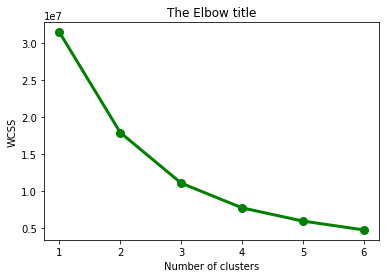

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss,linewidth=3, markersize=8,marker='o',color = 'green')
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [13]:
# finding the clusters based on input matrix "x"
from sklearn.cluster import KMeans 
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)
y_clusters

array([1, 0, 0, ..., 0, 3, 3], dtype=int32)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


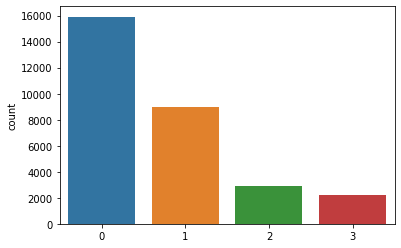

In [14]:
# countplot to check the number of clusters and number of customers in each cluster
import seaborn as sns
sns.countplot(y_clusters)

In [15]:
x[y_clusters == 3,1]

array([1., 2., 0., ..., 1., 1., 0.])

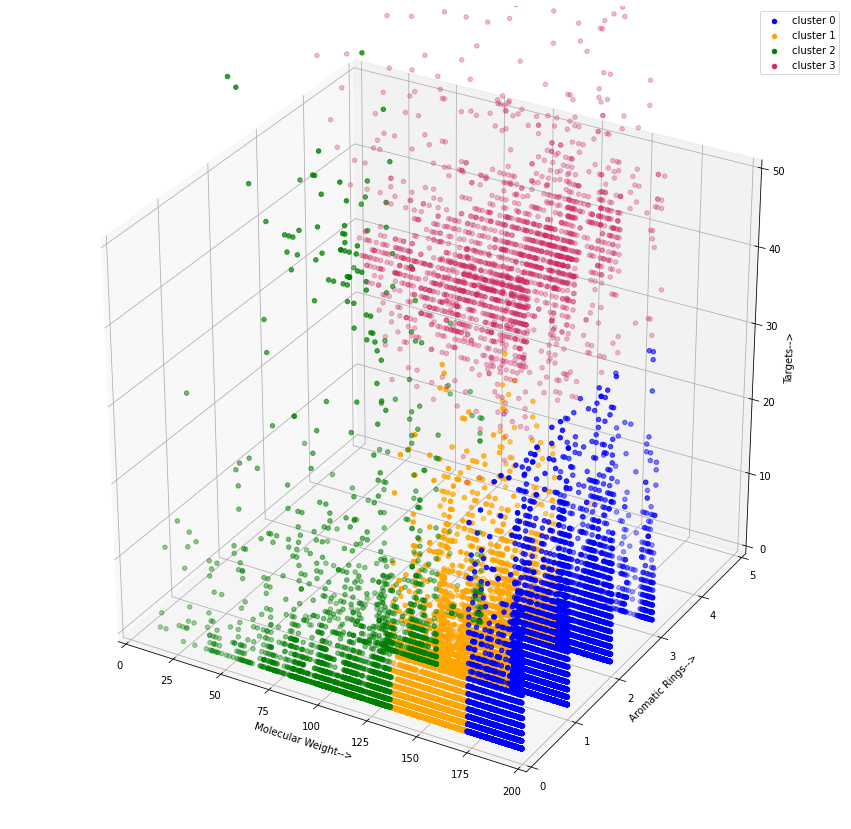

In [16]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
#size = [0,200,100,0,5,500,0,100]

ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 20 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 20 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 20 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 20 , color = '#D12B60', label = "cluster 3")

ax.set_xlim3d(0, 200)
ax.set_ylim3d(0, 5)
ax.set_zlim3d(0, 50)

ax.set_xlabel('Molecular Weight-->')
ax.set_ylabel('Aromatic Rings-->')
ax.set_zlabel('Targets-->')

ax.legend()
plt.show()